In [1]:
import pandas as pd

from lets_plot import *


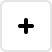
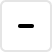
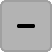
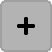
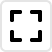
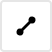
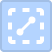
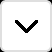
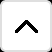
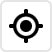
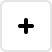
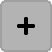
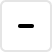
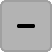
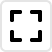
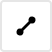
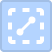
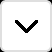
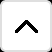
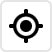

In [2]:
LetsPlot.setup_html()
LetsPlot.set_theme(theme_light())

In [3]:
mpg_df = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv')
mpg_df.head(4)

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact


In [4]:
p_mpg = ggplot(mpg_df, aes('class', fill='drv')) + theme(legend_position='none')

In [5]:
annotation = layer_labels().line('@..count..').line('@..proppct..').format('..proppct..', '{d}%')
short_annotation = layer_labels().line('@..count..')

In [6]:
p_mpg + geom_bar(labels=annotation, tooltips='none')

In [7]:
p_mpg + geom_bar(labels=annotation, tooltips='none') + coord_flip()

In [8]:
p_mpg + geom_bar(labels=annotation, tooltips='none', position='fill')

In [9]:
p_mpg + geom_bar(labels=annotation, tooltips='none', position='fill') + coord_flip()

In [10]:
gggrid([
    p_mpg + geom_bar(labels=short_annotation, tooltips='none', position='dodge'),
    p_mpg + geom_bar(labels=annotation, tooltips='none', position='dodge')
], ncol=2)

In [11]:
gggrid([
    p_mpg + geom_bar(labels=short_annotation, tooltips='none', position='dodge') + coord_flip(),
    p_mpg + geom_bar(labels=annotation, tooltips='none', position='dodge') + coord_flip()
], ncol=2)